In [1]:

round(abs(mybasel(2000) - pi^2/6), sigdigits=1)

LoadError: UndefVarError: `mybasel` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [2]:

function myrichardson(N)
    s1 = mybasel(N)
    s2 = mybasel(2*N)
    return 2*s2 - s1
end

myrichardson (generic function with 1 method)

In [3]:

round(abs(myrichardson(1000) - pi^2/6), sigdigits=1)

LoadError: UndefVarError: `mybasel` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [4]:
] add QuadGK

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `/workspaces/phys2200-lectures-rya21005/Project.toml`
  No Changes to `/workspaces/phys2200-lectures-rya21005/Manifest.toml`


In [5]:

using QuadGK

In [6]:
fun1(x) = 1/sqrt(x)

fun1 (generic function with 1 method)

In [7]:

round(quadgk(fun1, 0, 1)[1], sigdigits=5)

2.0

In [8]:

fun2(x) = exp(-x) * log(x)

fun2 (generic function with 1 method)

In [9]:

quadgk(fun2, 0, Inf)

(-0.5772156640944036, 4.619449696675028e-9)


# Euler's Method for IVP

In [10]:

"""
    t, y = myeulers(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a vector of correspondinig values
of the solution, y(t_i)
"""
function myeulers(fun, a, b, n, y1)
    t = range(a, b, n)
    y = zeros(n)
    h = t[2] - t[1]
    y[1] = y1
    for i = 1:(n-1)
        y[i+1] = y[i] + h * fun(t[i], y[i])
    end
    return t, y
end

myeulers

In [11]:

a = 0.0
b = 5.0
n = 64
y1 = 0.0
fun(t, y) = exp(-sin(t)) - y * cos(t)
yexact(t) = t * exp(-sin(t))

yexact (generic function with 1 method)

In [12]:

t, y = myeulers(fun, a, b, n, y1);

In [13]:

using PyPlot

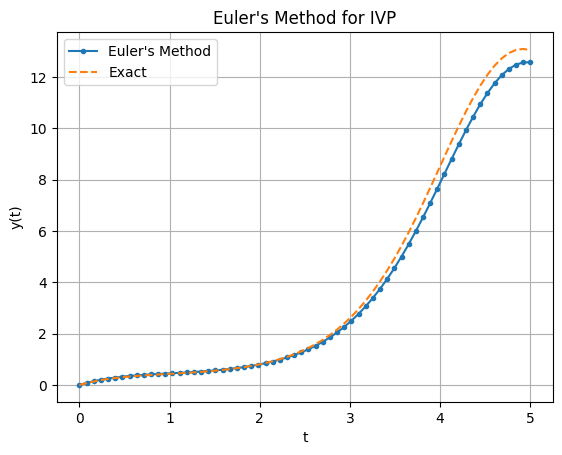

PyObject Text(0.5, 1.0, "Euler's Method for IVP")

In [14]:

plot(t, y, label="Euler's Method", marker=".")
plot(t, yexact.(t), label="Exact", linestyle="dashed")
grid(true)
legend()
xlabel("t")
ylabel("y(t)")
title("Euler's Method for IVP")

In [19]:

np = 9
hh = zeros(np)
gerr = zeros(np)

for i = 1:np
    n = 2^(i+3)
    t, y = myeulers(fun, a, b, n, y1)
    hh[i] = t[2] - t[1]
    gerr[i] = abs(yexact(b) - y[end])
end

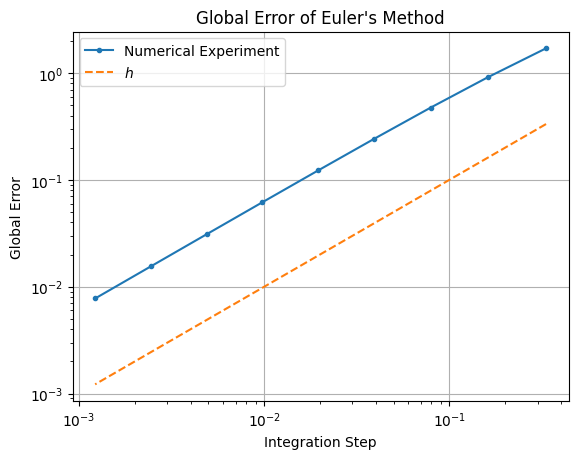

PyObject <matplotlib.legend.Legend object at 0x7305d97781a0>

In [25]:

loglog(hh, gerr, marker=".", label="Numerical Experiment")
loglog(hh, hh, linestyle="dashed", label=L"h")
grid(true)
title("Global Error of Euler's Method")
xlabel("Integration Step")
ylabel("Global Error")
legend()